# Hierarchical clustering
Nel seguente notebook si applica hierarchical clustering ai dati che abbiamo

In [1]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

df = pd.read_csv("dataset/CS1-dataset.csv",sep='\t',decimal=",",index_col=0)
df = df.drop(columns=['CustomerID','MinD', 'MaxD','Ts'])
df.head()


,I,Iu,Imax,E,PIL,Mb,MeanD,EDate
0,1707,21,12,4.335643,2.567,156.860294,0.000000,0.000000
1,1386,105,32,6.503112,2.567,356.232222,35.000000,2.226424
2,4992,113,360,6.504979,2.752,442.969333,24.266667,2.235084
3,439,24,80,4.494680,2.567,189.650000,55.400000,1.177965
4,80,1,32,0.000000,2.567,292.000000,13.000000,0.918296


## Transformation

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#StandardScaler corrisponde allo z scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)
print(X[:5])

[[8.67950446e-03 1.14025086e-02 2.29214420e-03 4.18976976e-01
  1.67671736e-01 5.78415905e-03 0.00000000e+00 0.00000000e+00]
 [7.04637379e-03 5.92930445e-02 6.45967910e-03 6.28431304e-01
  1.67671736e-01 1.31542413e-02 1.91780822e-01 9.61982496e-01]
 [2.53923838e-02 6.38540479e-02 7.48072515e-02 6.28611740e-01
  1.79798112e-01 1.63606087e-02 1.32968037e-01 9.65724206e-01]
 [2.22838391e-03 1.31128848e-02 1.64617629e-02 4.34345594e-01
  1.67671736e-01 6.99627969e-03 3.03561644e-01 5.08969615e-01]
 [4.01923126e-04 0.00000000e+00 6.45967910e-03 0.00000000e+00
  1.67671736e-01 1.07798009e-02 7.12328767e-02 3.96772868e-01]]


In [3]:
def plot_method(method="",clusters_max=2):
    silhouette_list = []
    best=[0,0]
    for k in range(2, clusters_max+ 1):
        hierarchical = AgglomerativeClustering(n_clusters=k,compute_full_tree='complete', linkage=method)
        hierarchical.fit(X)
        
        silhouette=silhouette_score(X, hierarchical.labels_)
        silhouette_list.append(silhouette)
        if(silhouette>best[1]):
            best[1] = silhouette
            best[0] = k
            print("Best ",best[0],best[1])
    plt.plot(silhouette_list)
    plt.title("Hierarchical Clustering - Method: Single") 
    plt.show()
    data_dist = pdist(X, metric='euclidean')
    data_link = linkage(data_dist, method=method, metric='euclidean')
    dendrogram(data_link, color_threshold=0.8, truncate_mode='lastp')
    '''plt.plot(res)
    plt.title("Hierarchical Clustering - Method: "+method) 
    plt.show()'''

# Clustering

### Params: I parametri sono il tipo di linkage (method="ward,single,complete,average") e clusters_max =numero di cluster massimo da provare

## Method Ward

Best  2 0.5672981930021745


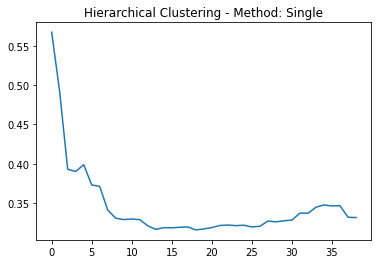

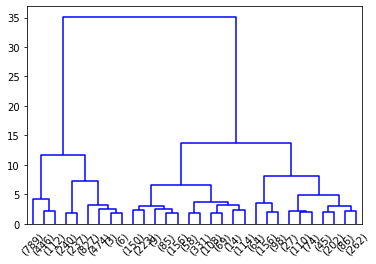

In [4]:
plot_method(method="ward",clusters_max=40)

## Method Complete

Best  2 0.38298810466969585


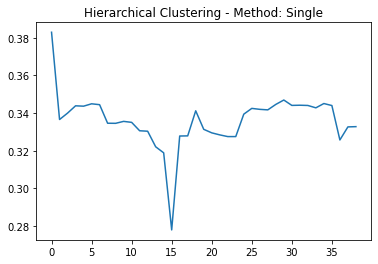

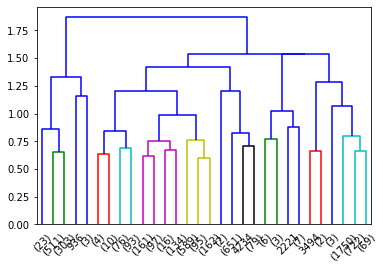

In [5]:
plot_method(method="complete",clusters_max=40)

## Method Average

Best  2 0.5679217063136259


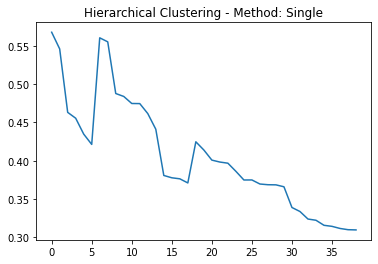

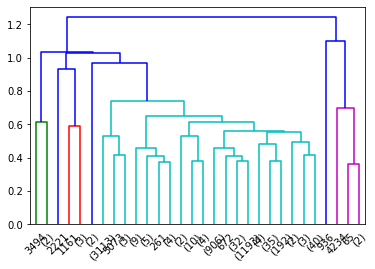

In [6]:
plot_method(method="average",clusters_max=40)

## Method Single

Best  2 0.6356910625009381


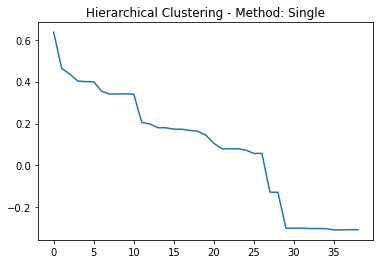

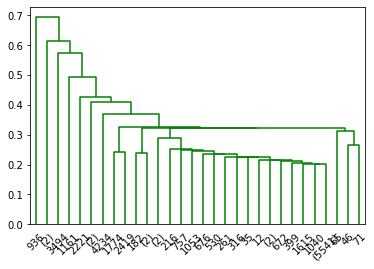

In [7]:
plot_method(method="single",clusters_max=40)